----------------------

#  Churn Prediction - A data science project (PART-1)

----------------------

## Problem Statement:

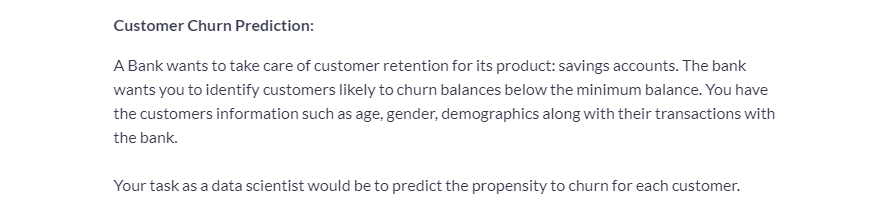

# Exploratory Data Analysis

--------------

## 1. Reading Files into Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('churn_prediction.csv')

In [3]:
data.shape

(28382, 21)

In [4]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [5]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [6]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

------------

## Variable Identification and Typecasting

-----------

In [7]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

### A. Integer Data Type

In [8]:
data.dtypes[data.dtypes=='int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

In [9]:
#converting some int64 to catagories
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['churn'] = data['churn'].astype('category')

In [10]:
data.dtypes[data.dtypes=='int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

### B. Float Data Type

In [11]:
data.dtypes[data.dtypes=='float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

In [12]:
data['dependents']=data['dependents'].astype('Int64')
data['city']= data['city'].astype('category')

In [13]:
#Checking updated data type list
data.dtypes[data.dtypes=='float64']

current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

### C. Object Data Type

In [14]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                           Int64
occupation                          object
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

In [15]:
data.dtypes[data.dtypes=='object']

gender              object
occupation          object
last_transaction    object
dtype: object

In [16]:
data['gender']=data['gender'].astype('category')
data['occupation']=data['occupation'].astype('category')

In [17]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

### D. DateTime Data Type

In [18]:
# creating an instance(date) of DatetimeIndex class using "last_transaction"
date=pd.DatetimeIndex(data['last_transaction'])

In [19]:
data['doy_ls_tran']=date.dayofyear
data['woy_ls_tran']=date.weekofyear
data['moy_ls_tran']=date.month
data['dow_ls_tran']=date.dayofweek

In [20]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,0.20,0.20,1458.71,1458.71,0,2019-05-21,141.0,21.0,5.0,1.0
1,2,2348,35,Male,0,self_employed,NaN,2,3214,5390.37,...,5486.27,100.56,6496.78,8787.61,0,2019-11-01,305.0,44.0,11.0,4.0
2,4,2194,31,Male,0,salaried,146.0,2,41,3913.16,...,6046.73,259.23,5006.28,5070.14,0,NaT,NaN,NaN,NaN,NaN
3,5,2329,90,NaN,<NA>,self_employed,1020.0,2,582,2291.91,...,0.47,2143.33,2291.91,1669.79,1,2019-08-06,218.0,32.0,8.0,1.0
4,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,...,588.62,1538.06,1157.15,1677.16,1,2019-11-03,307.0,44.0,11.0,6.0


In [21]:
data=data.drop(columns=['last_transaction'])

In [22]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_tran                        float64
woy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran

------------

# Min, Max and Range of Data

-------

## Isolating numerical columns

In [23]:
numerical_cols = data.select_dtypes(include=['int','float','Int64']).columns

In [24]:
numerical_cols

Index(['customer_id', 'vintage', 'age', 'dependents', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'doy_ls_tran',
       'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran'],
      dtype='object')

### 1. Min Observation

In [25]:
data['current_balance'].min()

-5503.96

In [26]:
data[data['current_balance']== data['current_balance'].min()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
12608,13467,2140,80,Male,0,retired,1096.0,1,27,-5503.96,...,2680.04,15229.44,7859.37,1050.17,2002.97,1,360.0,52.0,12.0,3.0


### 2. Max Observation

In [27]:
data['current_month_debit'].max()

7637857.36

In [28]:
data[data['current_month_debit'] == data['current_month_debit'].max()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
24095,25712,1902,90,Male,0,retired,1020.0,2,5,46.5,...,0.21,7637857.36,0.21,8399.62,24270.54,1,347.0,50.0,12.0,4.0


### 3. Range

In [29]:
print(data['age'].min(),  data['age'].max())

1 90


### 4. Max, Min & Range for each column

In [30]:
data[numerical_cols].max()

customer_id                          30301.00
vintage                               2476.00
age                                     90.00
dependents                              52.00
current_balance                    5905904.03
previous_month_end_balance         5740438.63
average_monthly_balance_prevQ      5700289.57
average_monthly_balance_prevQ2     5010170.10
current_month_credit              12269845.39
previous_month_credit              2361808.29
current_month_debit                7637857.36
previous_month_debit               1414168.06
current_month_balance              5778184.77
previous_month_balance             5720144.50
doy_ls_tran                            365.00
woy_ls_tran                             52.00
moy_ls_tran                             12.00
dow_ls_tran                              6.00
dtype: float64

In [31]:
data[numerical_cols].min()

customer_id                           1.00
vintage                              73.00
age                                   1.00
dependents                            0.00
current_balance                   -5503.96
previous_month_end_balance        -3149.57
average_monthly_balance_prevQ      1428.69
average_monthly_balance_prevQ2   -16506.10
current_month_credit                  0.01
previous_month_credit                 0.01
current_month_debit                   0.01
previous_month_debit                  0.01
current_month_balance             -3374.18
previous_month_balance            -5171.92
doy_ls_tran                           1.00
woy_ls_tran                           1.00
moy_ls_tran                           1.00
dow_ls_tran                           0.00
dtype: float64

In [32]:
for col in numerical_cols:
    print("range of {}{}{}{}{}{}{}{}".format(col,":"," ","[",data[col].min(), ", ",data[col].max(),"]"))

range of customer_id: [1, 30301]
range of vintage: [73, 2476]
range of age: [1, 90]
range of dependents: [0, 52]
range of current_balance: [-5503.96, 5905904.03]
range of previous_month_end_balance: [-3149.57, 5740438.63]
range of average_monthly_balance_prevQ: [1428.69, 5700289.57]
range of average_monthly_balance_prevQ2: [-16506.1, 5010170.1]
range of current_month_credit: [0.01, 12269845.39]
range of previous_month_credit: [0.01, 2361808.29]
range of current_month_debit: [0.01, 7637857.36]
range of previous_month_debit: [0.01, 1414168.06]
range of current_month_balance: [-3374.18, 5778184.77]
range of previous_month_balance: [-5171.92, 5720144.5]
range of doy_ls_tran: [1.0, 365.0]
range of woy_ls_tran: [1.0, 52.0]
range of moy_ls_tran: [1.0, 12.0]
range of dow_ls_tran: [0.0, 6.0]


# Mean & Variance

### Mean

In [33]:
#mean of age
print(data['age'].mean())

#mean of age who are likely to churn
print(data[data['churn']==1]['current_balance'].mean())

48.208336269466564
5220.884321292768


### Median

In [34]:
#median of age
data['age'].median()

46.0

### Standard Deviation and Variance

In [35]:
print(data['current_balance'].std())
print(data['current_balance'].var())

42598.71192323329
1814650257.5186183


### Describe Function

In [36]:
data.describe(include=[int,float])

,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
count,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,25159.000000,25159.000000,25159.000000,25159.000000
mean,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,295.045709,39.116300,10.142255,3.042728
std,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,86.284356,15.889797,2.788671,1.712724
min,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,1.000000,1.000000,1.000000,0.000000
25%,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,270.000000,33.000000,9.000000,1.000000
50%,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,335.000000,47.000000,12.000000,3.000000
75%,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,354.000000,50.000000,12.000000,5.000000
max,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,365.000000,52.000000,12.000000,6.000000


In [37]:
churn_age = data[data['churn']==1]['age']

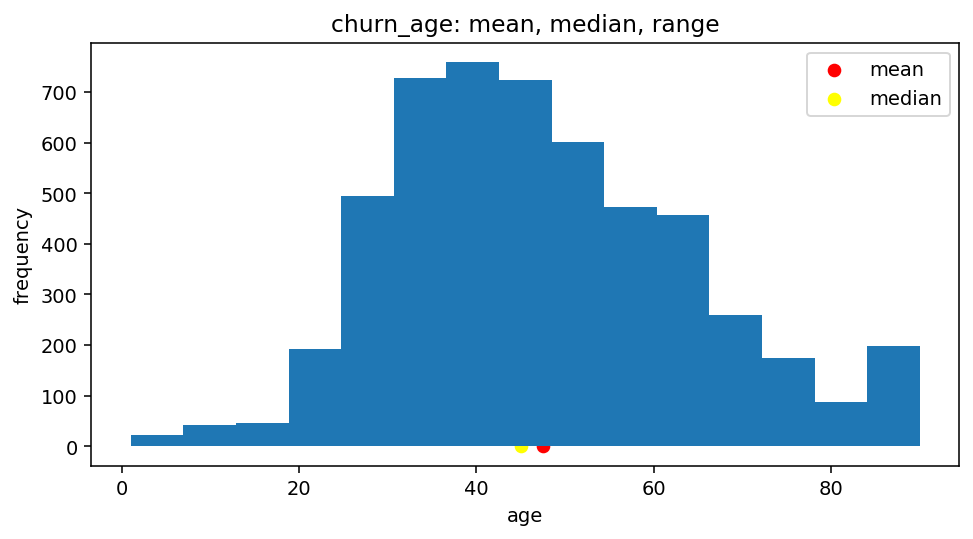

In [38]:
# setting image resolution
plt.figure(figsize=(8,4),dpi = 140)

#PLottign histogram and descriptive summary
plt.scatter(churn_age.mean(),0, label = 'mean', color = 'red')
plt.scatter(churn_age.median(),0,label = 'median', color= 'yellow')
plt.hist(churn_age, bins=15)

#axes labels
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('churn_age: mean, median, range')
plt.legend()

# KDE Plots

In [39]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
churn_age

3        90
4        42
12       73
14       48
16       49
         ..
28368    78
28372    49
28374    55
28379    47
28381    18
Name: age, Length: 5260, dtype: int64

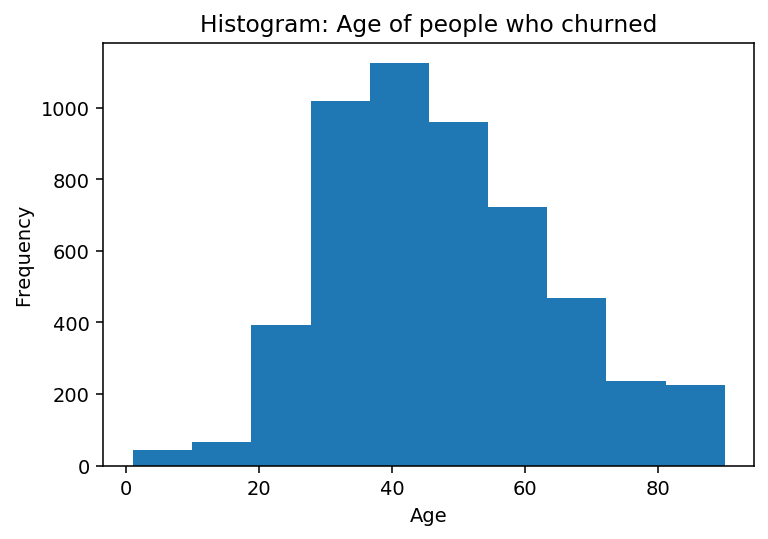

In [41]:
#plotting histogram again
plt.figure(dpi=140)
plt.hist(churn_age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram: Age of people who churned')
plt.show()

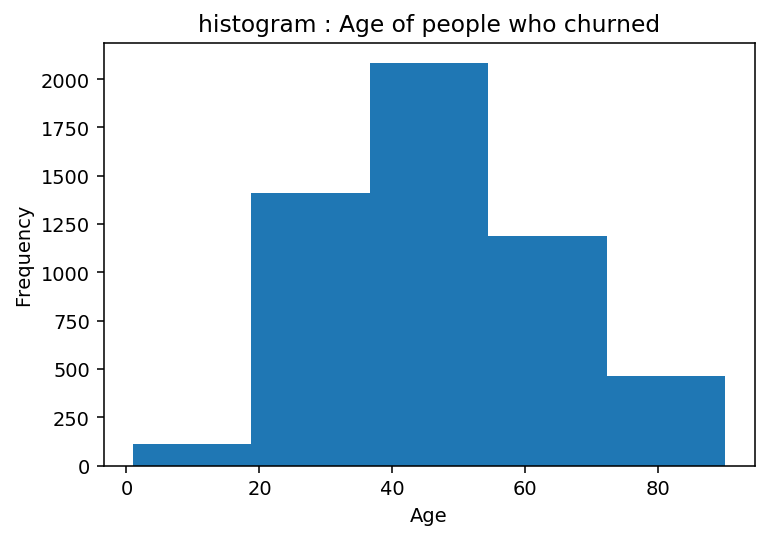

In [42]:
# plotting histogram with 5 bins
plt.figure(dpi = 140)
plt.hist(churn_age, bins=5)
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title("histogram : Age of people who churned")
plt.show()

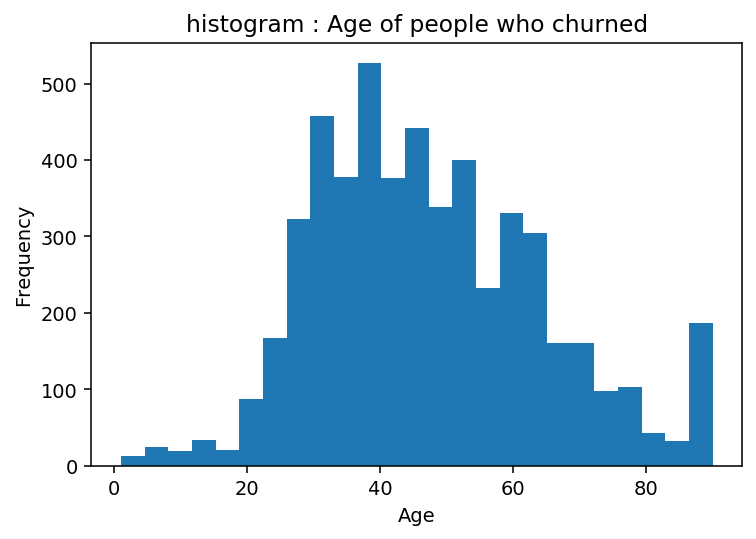

In [43]:
# plotting histogram with 25 bins
plt.figure(dpi = 140)
plt.hist(churn_age, bins = 25)
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title("histogram : Age of people who churned")
plt.show()

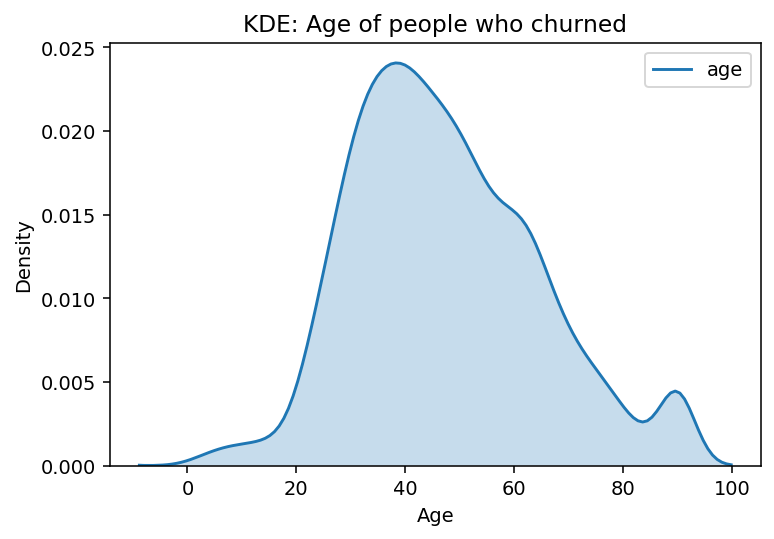

In [44]:
#plotting KdE plot using seaborn
plt.figure(dpi=140)
sns.kdeplot(churn_age, shade=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE: Age of people who churned')
plt.show()

In [45]:
# calculating points of mean, median and standard deviation
mean = churn_age.mean()
median = churn_age.median()
stdev = churn_age.mean()- churn_age.std(), churn_age.mean()+churn_age.std() 

# checking
mean, median, stdev

(47.461216730038025, 45.0, (30.285242583286085, 64.63719087678996))

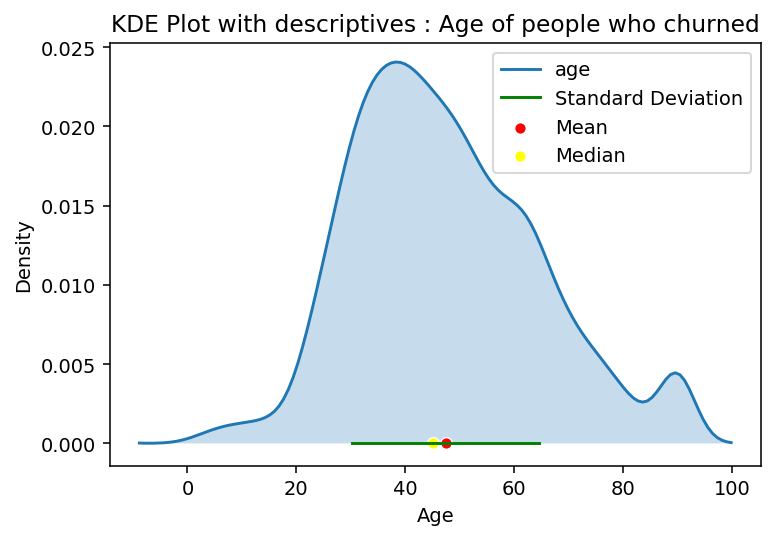

In [46]:
#plotting KDE plot with descriptives
plt.figure(dpi=140)
sns.kdeplot(churn_age, shade=True)
sns.scatterplot([mean],[0], color='red', label='Mean')
sns.scatterplot([median], [0], color='Yellow', label='Median')
sns.lineplot(stdev,[0,0], color= 'green', label='Standard Deviation')
plt.xlabel("Age")
plt.ylabel('Density')
plt.title("KDE Plot with descriptives : Age of people who churned")
plt.show()

# Continuous Distribution

In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
import pylab as py 

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")

## Age of customers

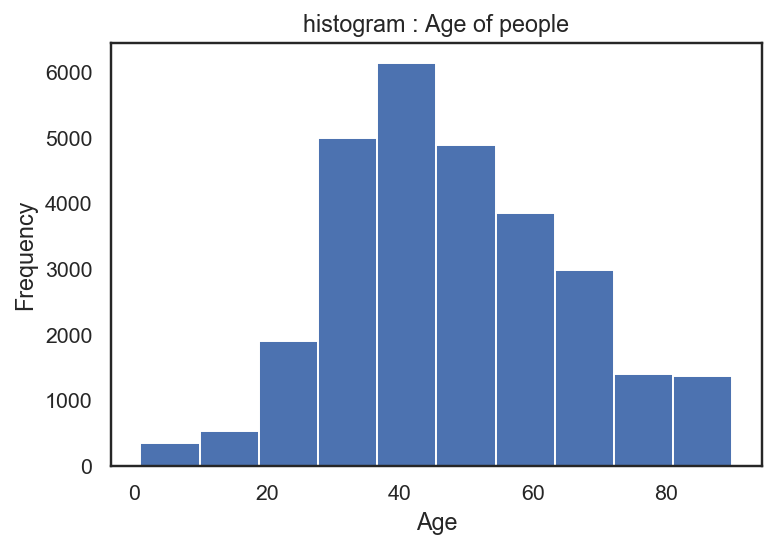

In [48]:
# plotting histogram
plt.figure(dpi = 140)
plt.hist(data['age'])
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title("histogram : Age of people")
plt.show()

In [49]:
# calculating points of standard deviation
age=data['age']
a_mean = age.mean()
a_median = age.median()
a_stdev = age.mean()- age.std(), age.mean()+ age.std() 

# checking
a_mean, a_median, a_stdev

(48.208336269466564, 46.0, (30.401172896500047, 66.01549964243308))

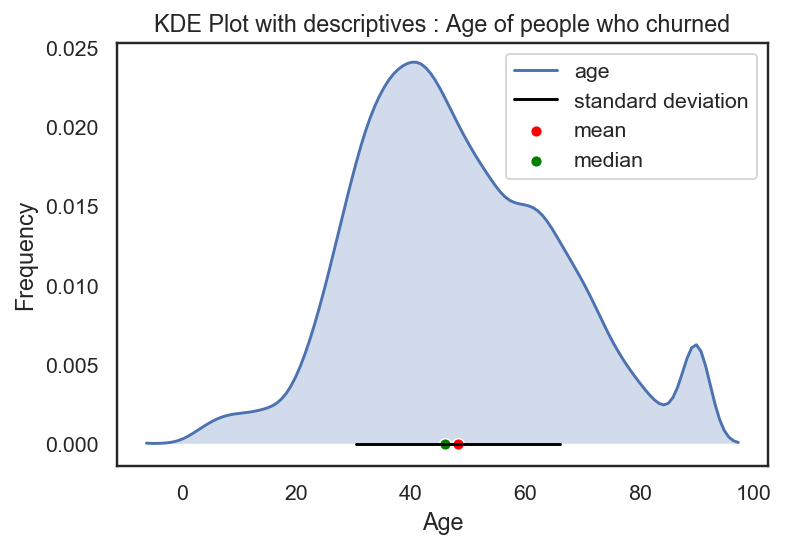

In [50]:
# plotting KDE plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(age, shade = True)
sns.scatterplot( [a_mean], [0], color='red', label='mean')
sns.scatterplot( [a_median], [0], color='green', label='median')

sns.lineplot( a_stdev, [0,0], color='black', label='standard deviation')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title("KDE Plot with descriptives : Age of people who churned")
plt.show()

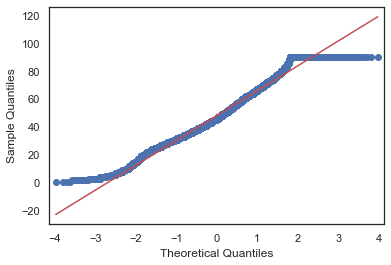

In [51]:
#qq plot explanation
sm.qqplot(age, line='s')
py.show()

In [52]:
age.kurtosis()

-0.16866785691275865

## Vintage

In [53]:
# calculating measures
v_mean = data['vintage'].mean()
v_median = data['vintage'].median()
v_mode = data['vintage'].mode()


# checking
print(v_mean) 
print(v_median)
print( )
print(v_mode)

2091.1441054189277
2154.0

0    2251
1    2260
dtype: int64


In [54]:
print(data[data['vintage']==2251].shape[0])
print(data[data['vintage']==2260].shape[0])

69
69


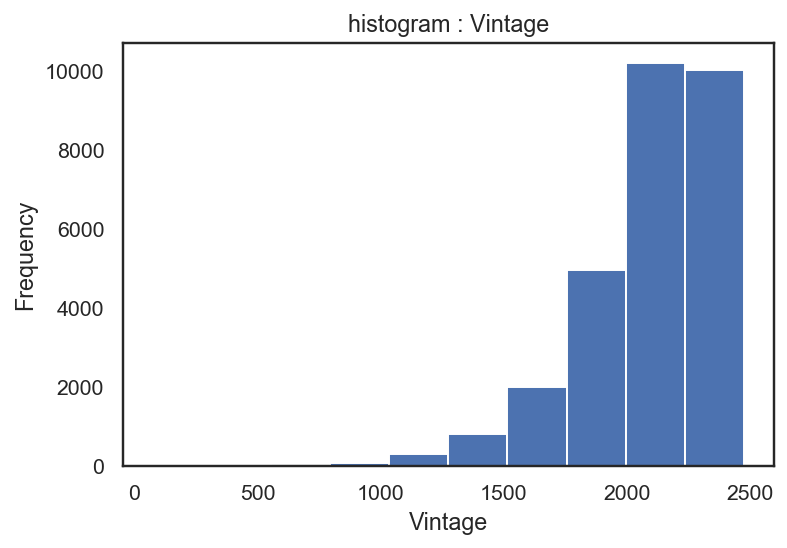

In [55]:
# plotting histogram
plt.figure(dpi = 140)
plt.hist(data['vintage'])
plt.xlabel("Vintage")
plt.ylabel('Frequency')
plt.title("histogram : Vintage")
plt.show()

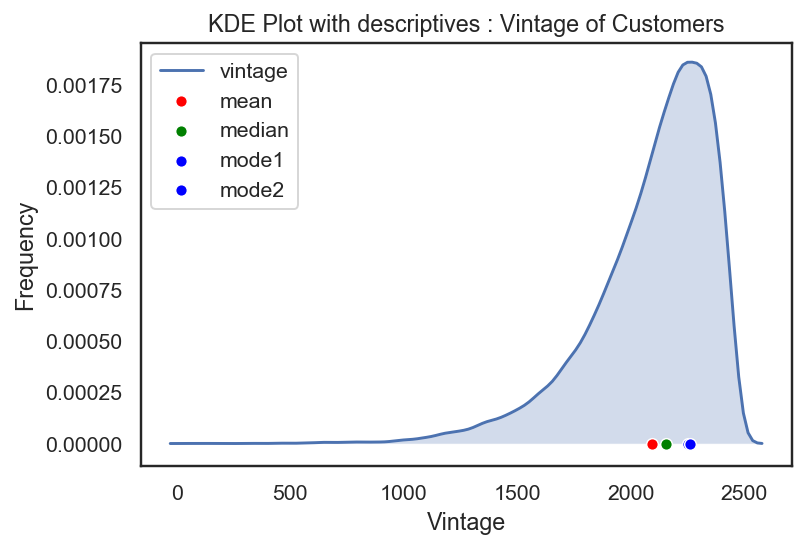

In [56]:
# plotting KDE plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(data['vintage'], shade = True)
sns.scatterplot( [v_mean], [0], color='red', label='mean')
sns.scatterplot( [v_median], [0], color='green', label='median')
sns.scatterplot( [v_mode[0]],[0], color='blue', label='mode1')
sns.scatterplot( [v_mode[1]],[0], color='blue', label='mode2')


plt.xlabel("Vintage")
plt.ylabel('Frequency')
plt.title("KDE Plot with descriptives : Vintage of Customers")
plt.show()

In [57]:
#explain Skewness
data['vintage'].skew()

-1.3889357082821185

In [58]:
#Kurtosis Positive
data['vintage'].kurtosis()

2.7234245375227926

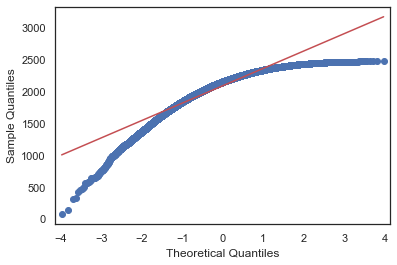

In [59]:
#qq plot explain
sm.qqplot(data['vintage'], line='s') 
py.show() 

# Univariate Analysis: Numerical Variables

In [60]:
#Numerical Datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [61]:
#segregating variables into groups
customer_details=['customer_id','age', 'vintage']
current_month=['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month=['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters=['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date=['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [62]:
#custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
        
    '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives along with KDE.
  
  Runs a loop: Calculate all the descriptives of i(th) variable and plot/print it
    '''
    
    size = len(var_group)
    plt.figure(figsize=(7*size,3), dpi=100)
    
    
    #looping for each variable
    for j,i in enumerate(var_group):
        
        #calculating descriptives of variable
        mini=data[i].min()
        maxi=data[i].max()
        mean=data[i].mean()
        median=data[i].median()
        st_dev=data[i].std()
        skew=data[i].skew()
        kurt=data[i].kurtosis()
        
        #calculating points of standard deviation
        points = mean - st_dev, mean + st_dev
        
        #plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i],shade=True)
        sns.lineplot(points, [0,0], color='black', label="std_dev")
        sns.scatterplot([mini,maxi],[0,0], color='orange', label='min/max')
        sns.scatterplot([mean],[0],color='red', label='mean')
        sns.scatterplot([median],[0], color='blue', label='median')
        plt.xlabel('{}'.format(i), fontsize=20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {}; \nskew = {}; range = {}; \nmean = {}; median = {}'.format((round(points[0],2), round(points[1],2)),
                                                                                                         round(kurt,2),
                                                                                                         round(skew,2),
                                                                                                         (round(mini,2),round(maxi,2)),
                                                                                                          round(mean,2),
                                                                                                          round(median,2)
                                                                                                         ))
        

## (i) customer_information

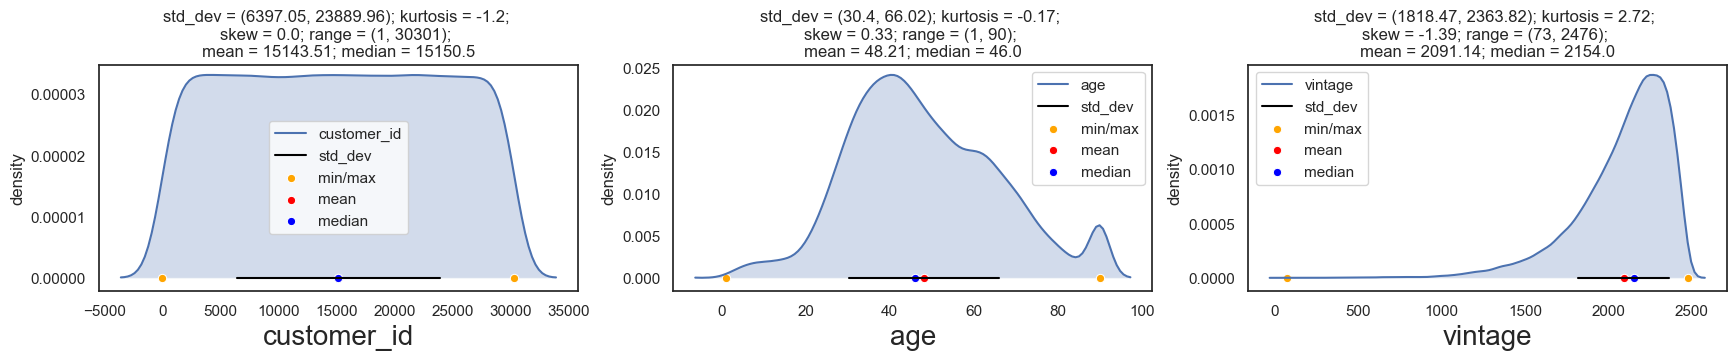

In [63]:
UVA_numeric(data,customer_details)

### Summary of Customer_Information:

- **customer_id**:
    - Variable is **unique for every customer, hence uniform** distribution
    - This variable **does not contribute any information**
    - Can be eliminated from data
    
- **age:**
    - Median Age = 46
    - **Most customers are between 30 to 66**
    - skewness +0.33 : customer age is **negligibly biased towards younger age**
    - **kurtosis = -0.17 :** very less likely to have extreme/outlier values
    
- **vintage:**
    - Most customeres joined between 2100 and 2650 days from the day of data extraction.
    - **skewness: -1.39** : this is left skewed. **Most of the customers have been with the bank for a longer period which is also signified by the negative skewness of the plot.**
    - **Kurtosis = 2.72** : Extreme values & outliers are very likely to be present in vintage.
    
### Things to investigate further down the road:

- The batch of **high number of very old age customers** in age variable.
- Churn Rate of high vintage customers

## (ii) current_month

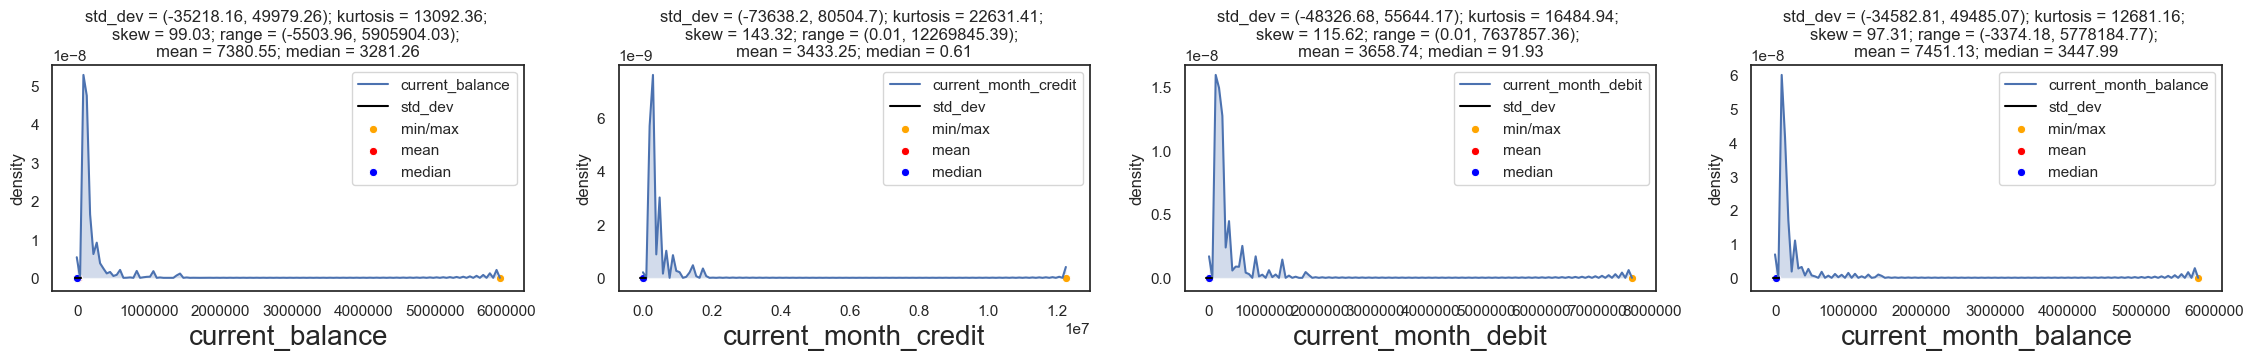

In [64]:
UVA_numeric(data, current_month)

### Summary:

- Considering the kurtosis and skewness value for all 4 of thesee plots, outliers/extreme values are present.
- Median of both current month credit & debit clearly is much lower & given that range has no negative values, it implies that there are lot of customers with very low number of transactions with the bank.

### Need to remove Outliers to visualise these plots

In [65]:
# standard deviation factor
factor = 1

# copying current_month
cm_data=data[current_month]

# filtering using stamdard deviation (not considering observations > 3 * standard deviation)
cm_data=cm_data[cm_data['current_balance']<factor*cm_data['current_balance'].std()]
cm_data=cm_data[cm_data['current_month_credit']<factor*cm_data['current_month_credit'].std()]
cm_data=cm_data[cm_data['current_month_debit']<factor*cm_data['current_month_debit'].std()]
cm_data=cm_data[cm_data['current_month_balance']<factor*cm_data['current_month_balance'].std()]

# checking how many points are removed
print('Data:{}        cm_data:{}'.format(len(data),len(cm_data)))
print('No. of points removed: {}'.format(len(data)-len(cm_data)))

Data:28382        cm_data:18884
No. of points removed: 9498


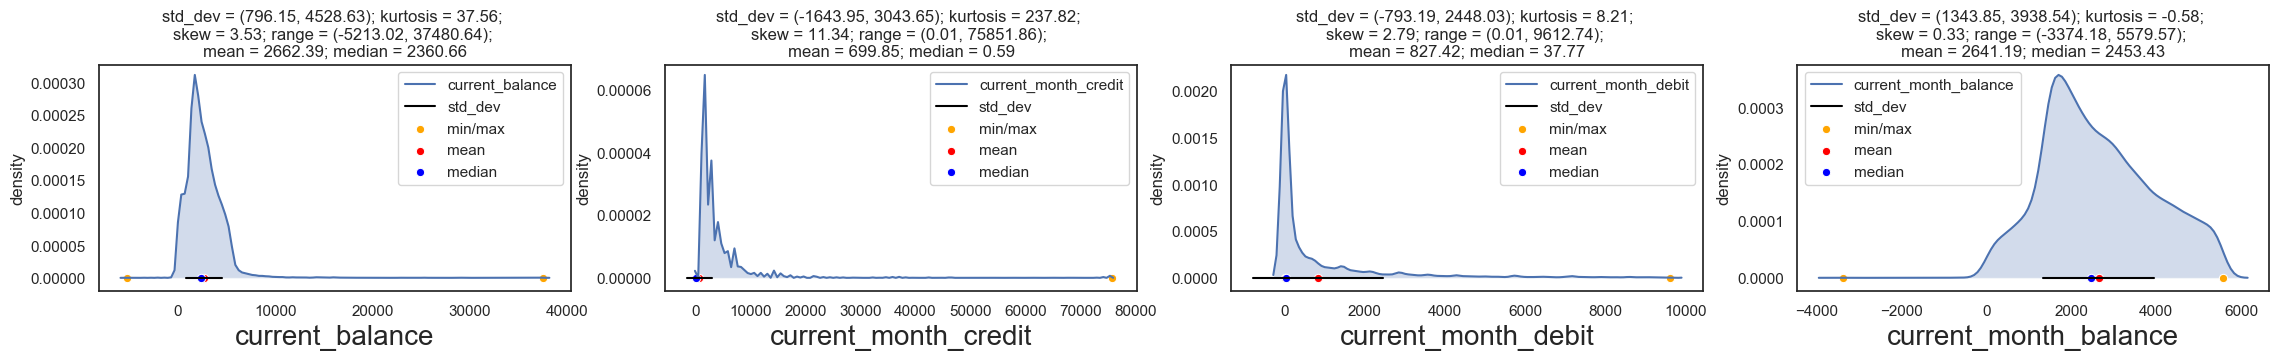

In [66]:
UVA_numeric(cm_data, current_month)

### Summary of current_month
- After removing extreme/outliers, plots are still very skewed with a lot of values concentrated to lower balances/credit/debit

### Things to investigate further:
1. **Is there any common trait/relation between the customers who are performing high transaction credit/debits?**
2. **Customers who are performing high amount of transactions, are they doing it every month?**

## (iii) previous_month

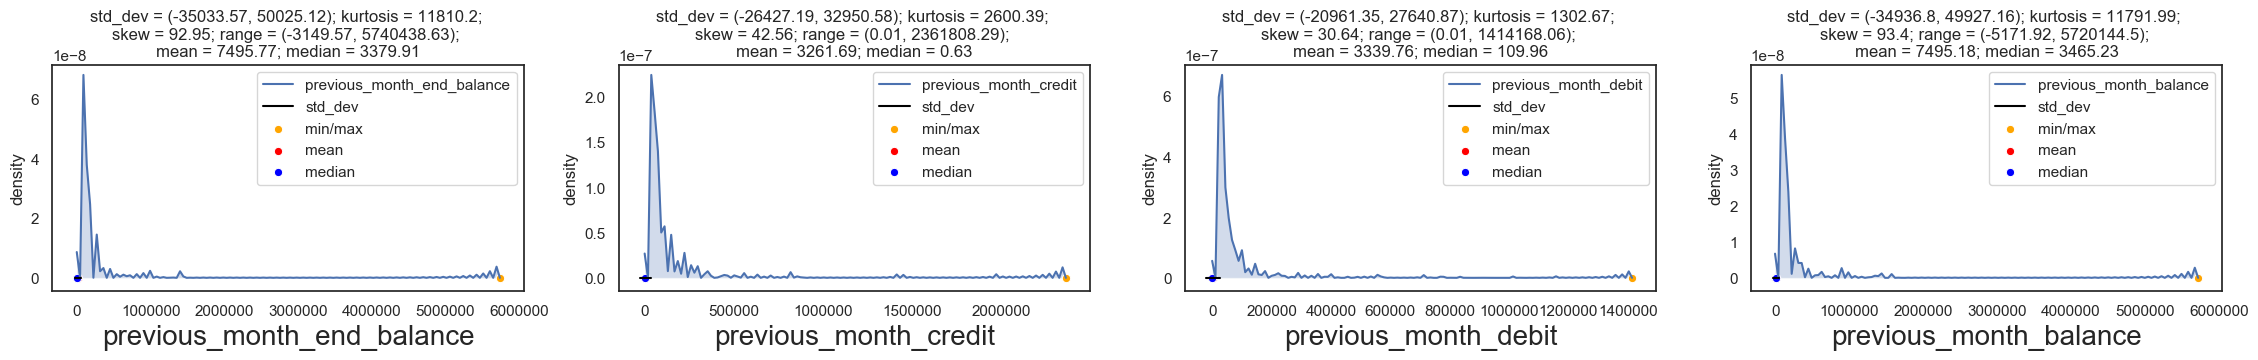

In [67]:
UVA_numeric(data, previous_month)

### Summary of previous_month
- This looks very similar to current_month. Most of the customers perform low amount transactions.

## (iv) previous_quarters

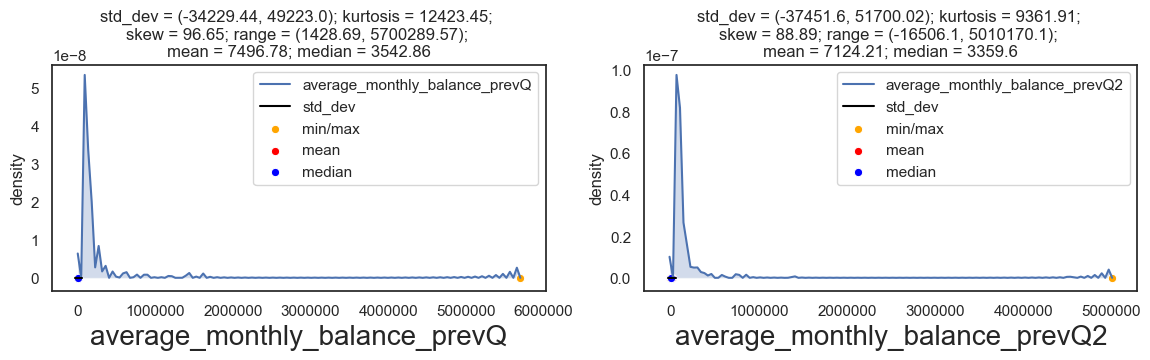

In [68]:
UVA_numeric(data,previous_quarters)

### Summary:

- The general trend still follows, it is crucial that we find out if there is any common trait between the customers doing high amount of transactions.

## (v) transaction_date

Transaction date is the last date of transaction with the bank in the previous 12 months

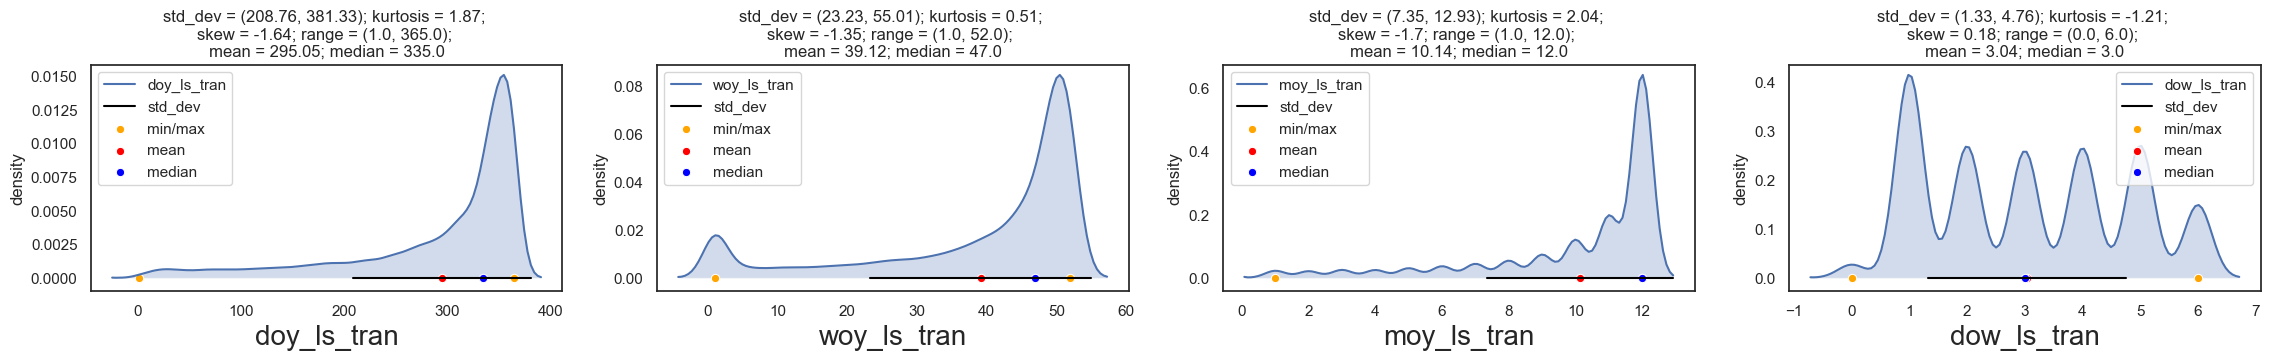

In [69]:
UVA_numeric(data, transaction_date)

### Summary

- **Day-of_Year**
    - Most of the last transactions were made in the last 60 days of the extraction of data.
    - There are transactions which were made more than a year ago.
    
- **Week_of_Year & Month_of_Year:** these variables validate the findings from the **day_of_year**.


### Things to investigate further:

- "What is the churn rate of customers whose last transactions was 6 months ago?"

--------------

# Discrete Variables

In [70]:
#importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [71]:
#distribution of gender
data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [72]:
data['gender'].value_counts()/sum(data['gender'].value_counts().values)

Male      0.594034
Female    0.405966
Name: gender, dtype: float64

### _OR_

In [73]:
data['gender'].value_counts(normalize=True)

Male      0.594034
Female    0.405966
Name: gender, dtype: float64

In [74]:
data['occupation'].nunique()

5

In [75]:
data['occupation'].mode()

0    self_employed
Name: occupation, dtype: category
Categories (5, object): [company, retired, salaried, self_employed, student]

In [76]:
data['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

## 1. Bernoulli

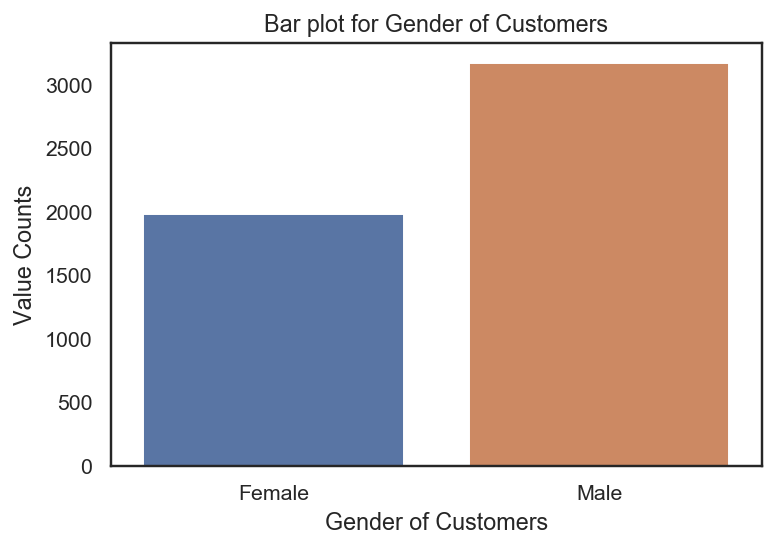

In [77]:
plt.figure(dpi=140)
sns.barplot(x=data[data['churn']==1]['gender'].value_counts().index,  y = data[data['churn']==1]['gender'].value_counts().values)
plt.xlabel('Gender of Customers')
plt.ylabel('Value Counts')
plt.title('Bar plot for Gender of Customers')
plt.show()

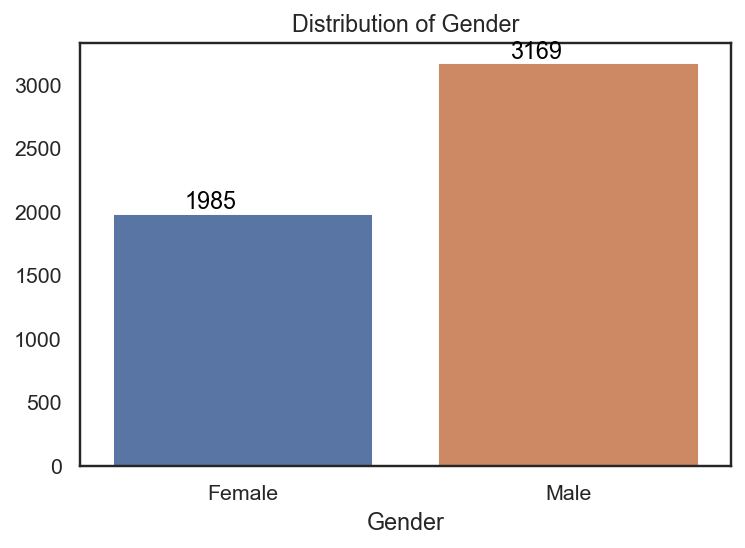

In [78]:
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['gender'].value_counts().index, y=data[data['churn']==1]['gender'].value_counts().values, orient = 'v')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
for p in ax.patches:
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

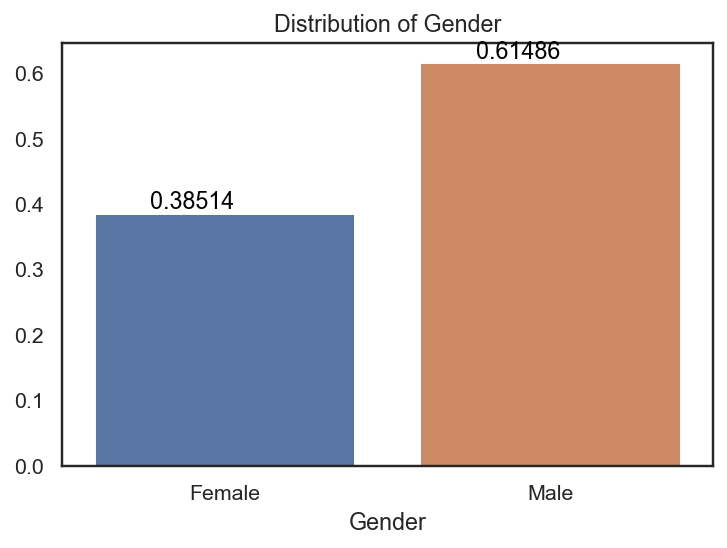

In [79]:
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['gender'].value_counts().index, y = data[data['churn']==1]['gender'].value_counts(normalize=True).values, orient = 'v')
plt.title('Distribution of Gender')
plt.xlabel('Gender')

for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

## 2. Categorical

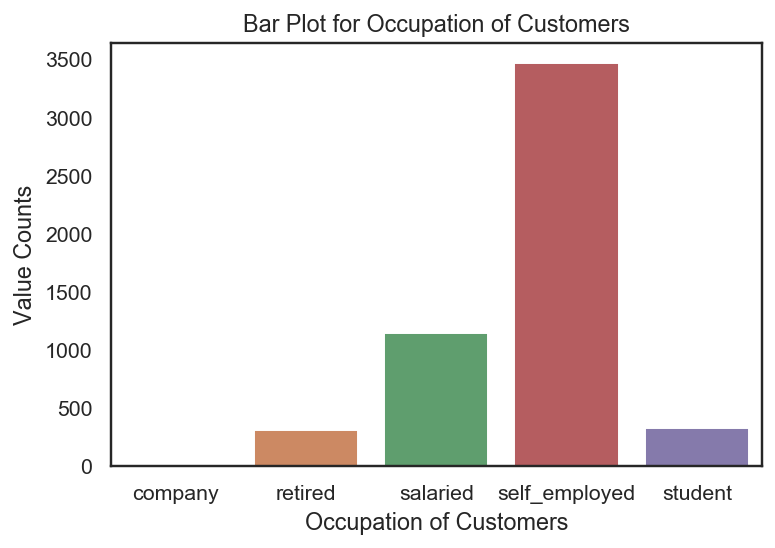

In [80]:
plt.figure(dpi = 140)
sns.barplot(x=data[data['churn']==1]['occupation'].value_counts().index, y = data[data['churn']==1]['occupation'].value_counts().values)
plt.xlabel("Occupation of Customers")
plt.ylabel('Value Counts')
plt.title("Bar Plot for Occupation of Customers")
plt.show()


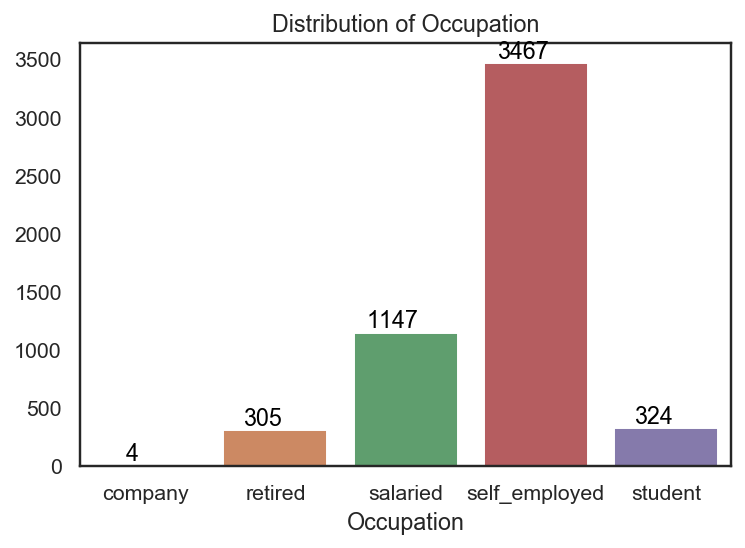

In [81]:
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['occupation'].value_counts().index, y = data[data['churn']==1]['occupation'].value_counts().values, orient = 'v')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

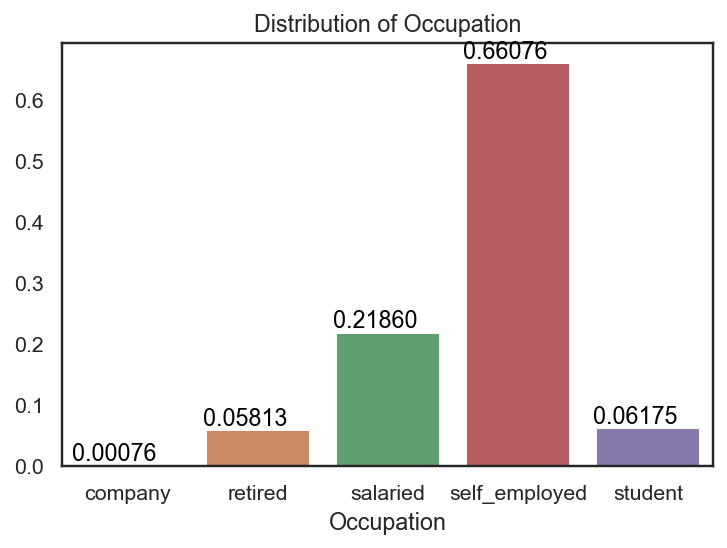

In [82]:
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['occupation'].value_counts().index, y = data[data['churn']==1]['occupation'].value_counts(normalize=True).values, orient = 'v')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')

for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

# Univariate Analysis: Categorical Variables

In [83]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

In [84]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

## customer_info

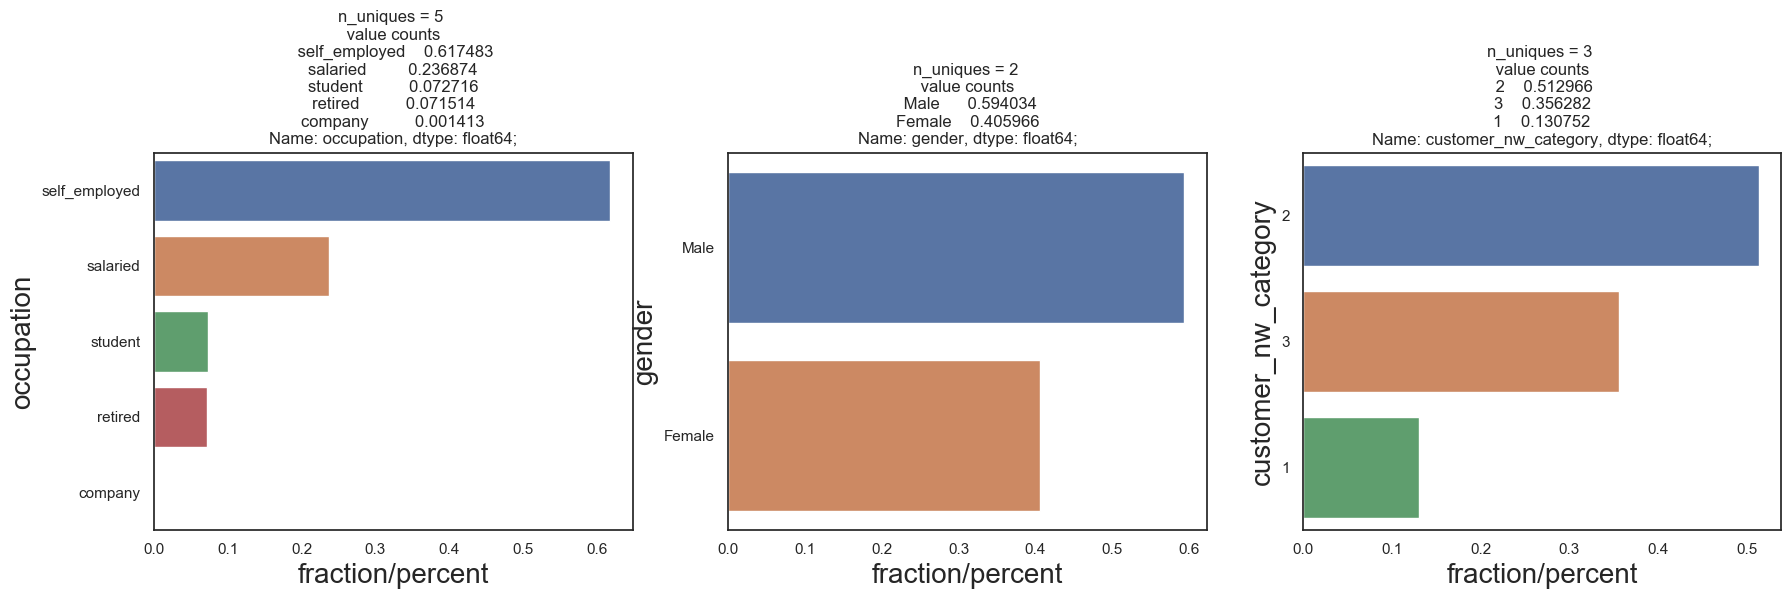

In [85]:
UVA_category(data, ['occupation', 'gender', 'customer_nw_category'])

**Summary**
* Occupation
  * Majority of people are self_employed.
  * There are extremely few Company Accounts. Might explain Outlier/Extreme values in credit/debit.

* Gender:
  *  Males accounts are 1.5 times in number than Female Accounts.

* customer_nw_category:
  *  Half of all the accounts belong to the 3rd net worth category.
  *  Less than 15% belong to the highest net worth category.

**Things to investigate further down:**
* Possibility: Company accounts are the reason behind the outlier transactions.
* Possibility: customers belonging to the highest net worth category may explain the skewness of the transactions.

## account_info

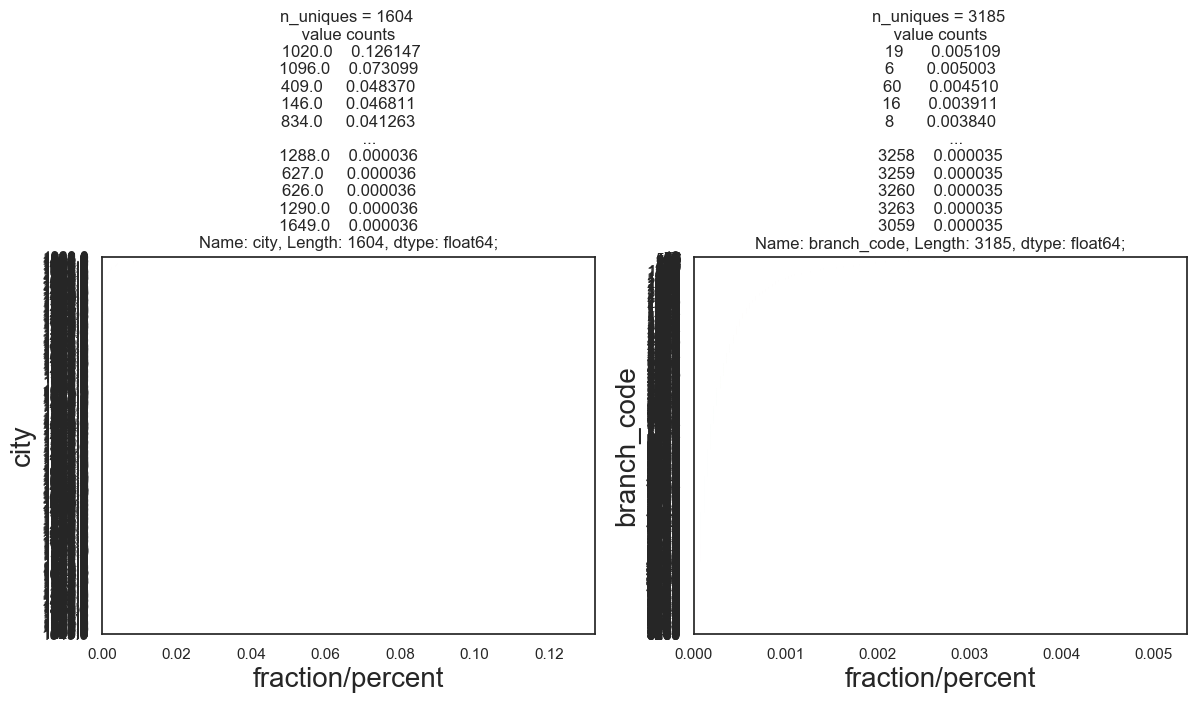

In [86]:
UVA_category(data, ['city', 'branch_code'])

(0, 0.02)

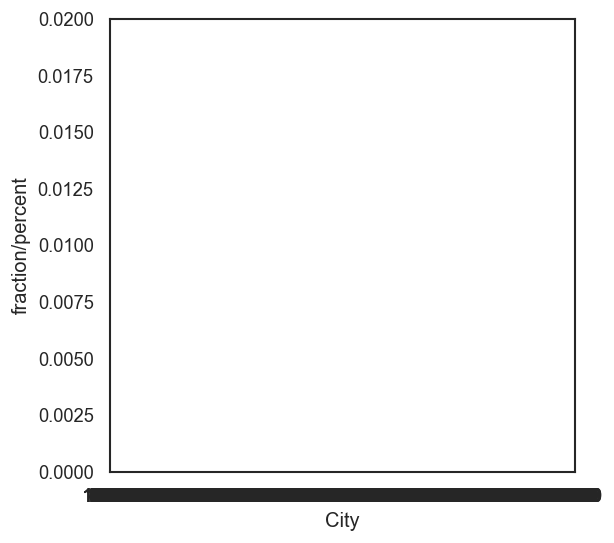

In [87]:
#Plotting "city"
plt.figure(figsize = (5,5), dpi = 120)
city_count = data['city'].value_counts(normalize=True)
sns.barplot(city_count.index, city_count , order = city_count.index)
plt.xlabel('City')
plt.ylabel('fraction/percent')
plt.ylim(0,0.02)

Text(0, 0.5, 'fraction/percent')

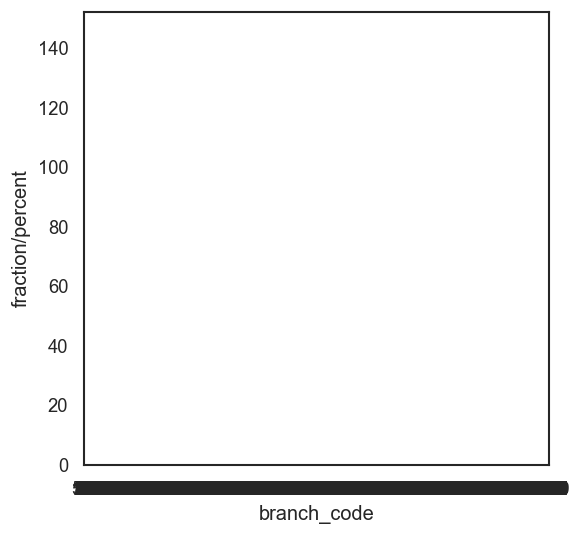

In [88]:
#Plotting "branch_code"
plt.figure(figsize = (5,5), dpi = 120)
branch_count = data['branch_code'].value_counts()
sns.barplot(branch_count.index, branch_count , order = branch_count.index)
plt.xlabel('branch_code')
plt.ylabel('fraction/percent')
#plt.ylim(0,0.02)

**Summary:**
for both variable "city" and "branch_code", there are too many categories.

**Things to investigate further Down**
* Popular cities and branch code might be able to explain the skewness and outliers of credit/debit variables.
* Possibility that cities and branch code with very few accounts may lead to churning.

## churn

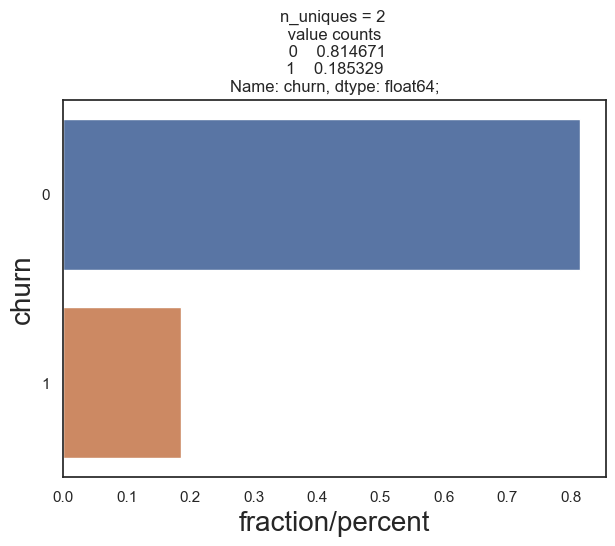

In [89]:
UVA_category(data, ['churn'])

**Summary**
* Number of people who churned are 1/4 times of the people who did not churn in the given data.

# Univariate: Missing Values

In [90]:
# finding number of missing values in every variable
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
doy_ls_tran                       3223
woy_ls_tran                       3223
moy_ls_tran                       3223
dow_ls_tran                       3223
dtype: int64

**Things to investigate further down:**
*    Gender: Do the customers with missing gender values have some common behaviour in-
  * churn: do missing values have any relation with churn?

* Dependents:
 * Missing values might be similar to zero dependents
 * churn: do missing values have any relation with churn?

* Occupation:
 * Do missing values have similar behaviour to any other occupation
 * do they have some relation with churn?

* city:
  * the respective cities can be found using branch_code

* last_transaction:
  * checking their previous month and current month and previous_quarter activity might give insight on their last transaction.

* For almost all the above:

  * vintage: might be recording errors from same period of joining
  * branch_code: might be recording error from certain branch


# Univariate Analysis: Outliers

In [29]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

In [31]:
# seggregating variables into groups
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

### current_month and previous_month


True
True
True
True


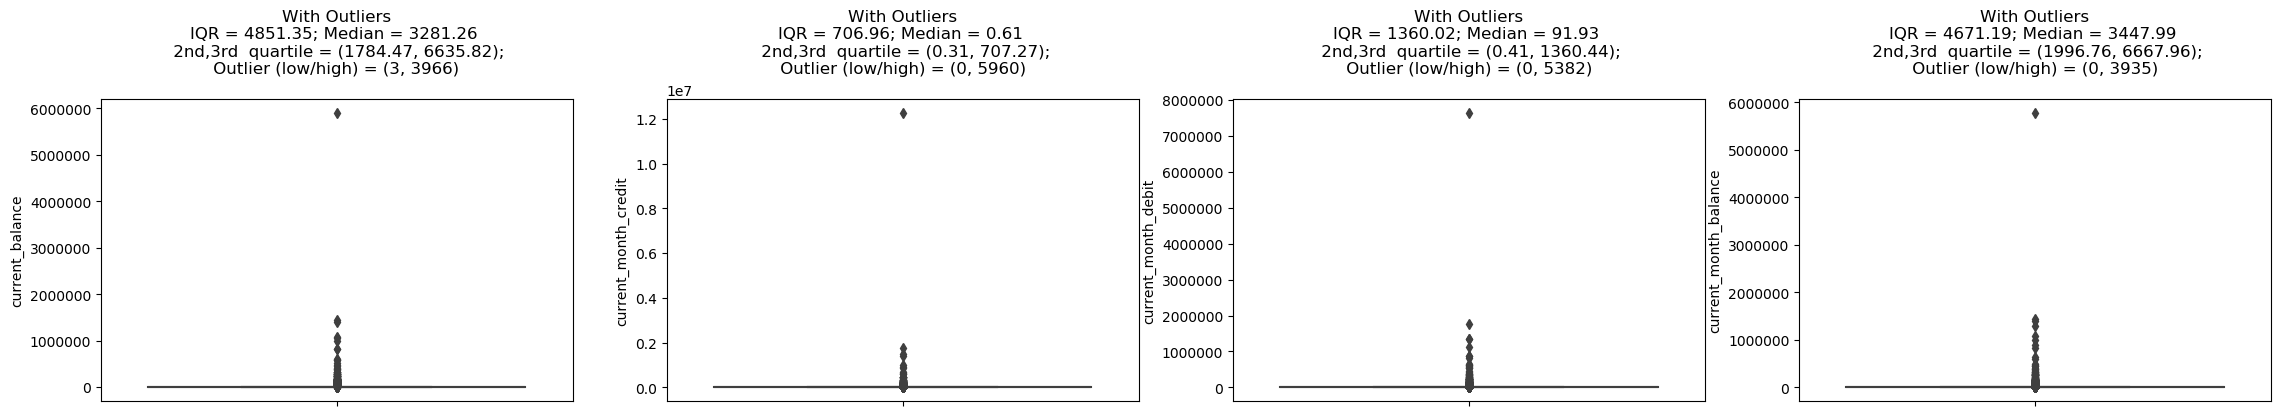

In [32]:
UVA_outlier(data, current_month)

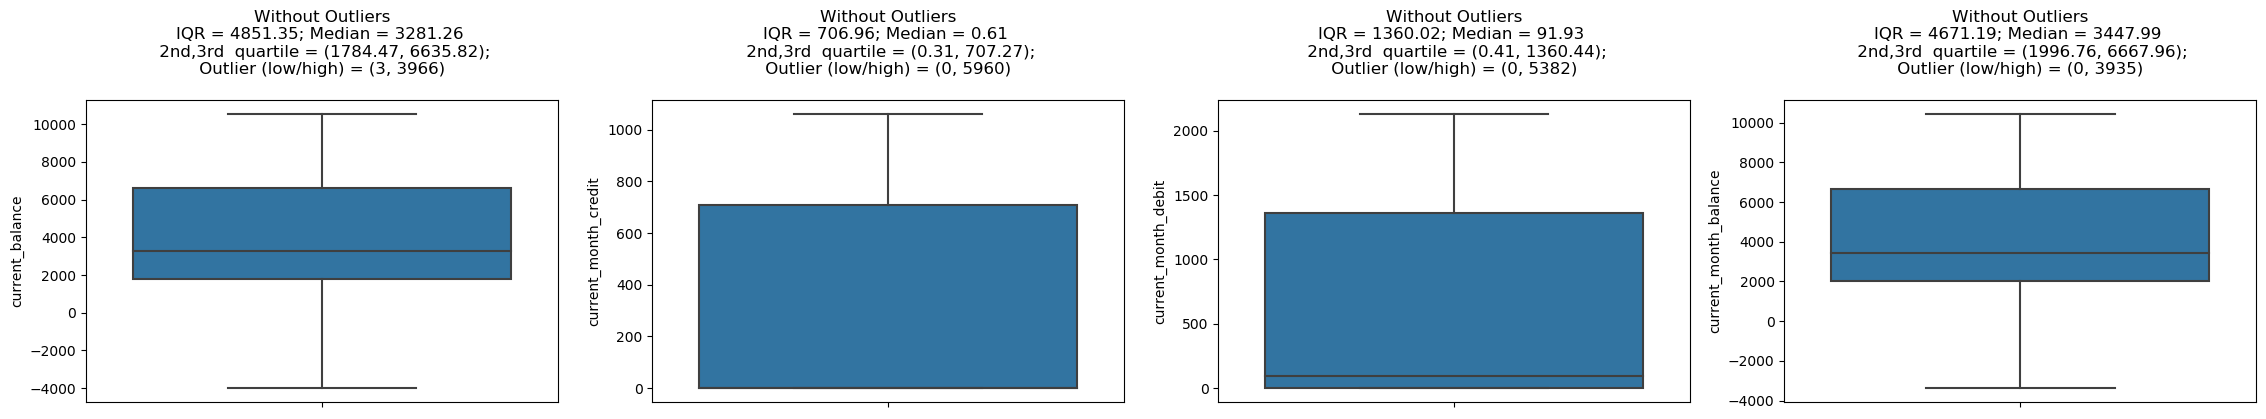

In [33]:
UVA_outlier(data, current_month, include_outlier=False)

True
True
True
True


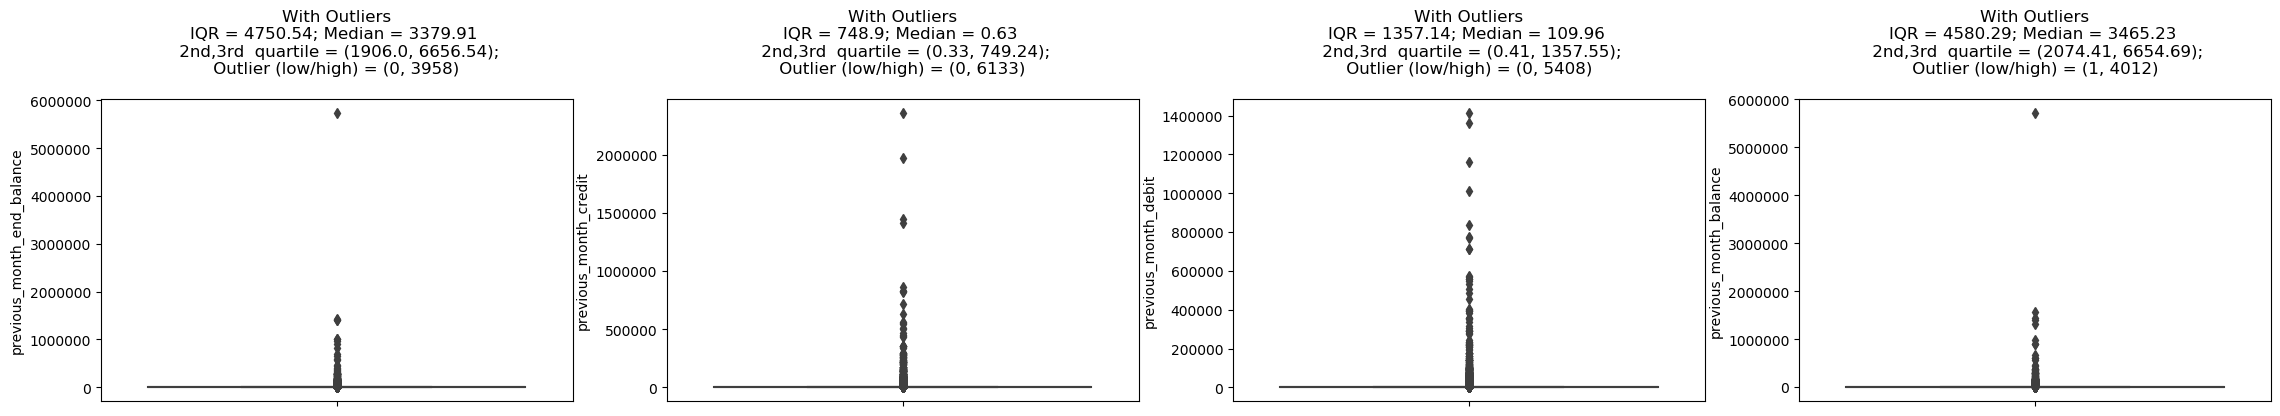

In [34]:
UVA_outlier(data, previous_month)

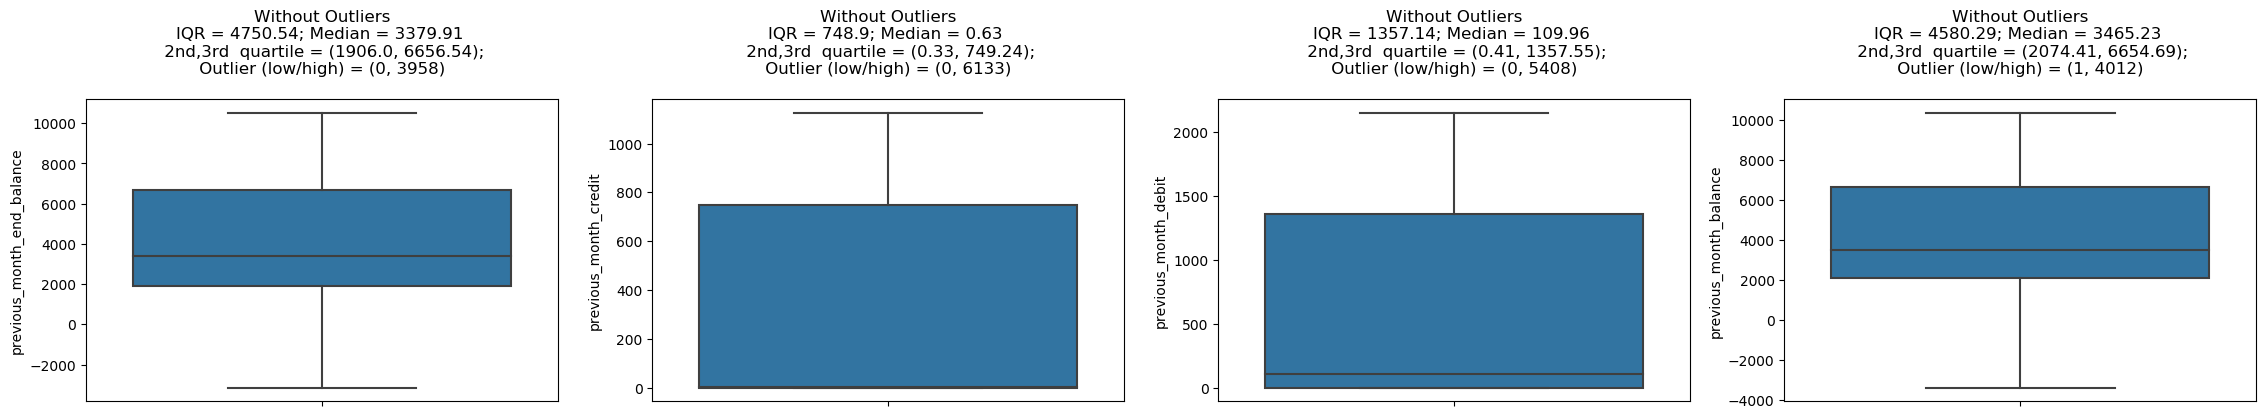

In [35]:
UVA_outlier(data, previous_month, include_outlier=False)

**Summary:**
* If we look at corresponding plots in the outputs above, there seems to be a strong relation between the corresponding plots of previous_month and current_month variables.

* Outliers are significant in number and very similar in number between corresponding plots. Which indicates some inherent undiscovered behviour of Outliers.

### previous quarters

True
True


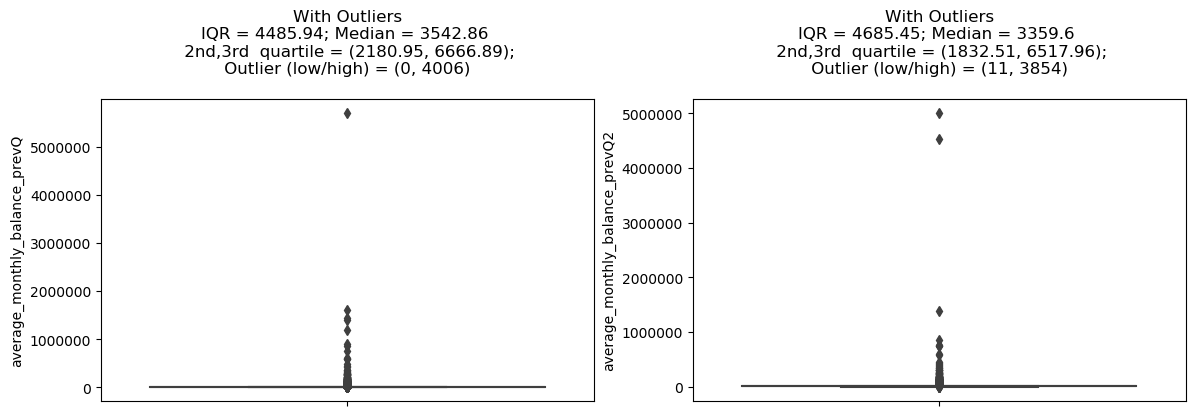

In [36]:
UVA_outlier(data,previous_quarters)

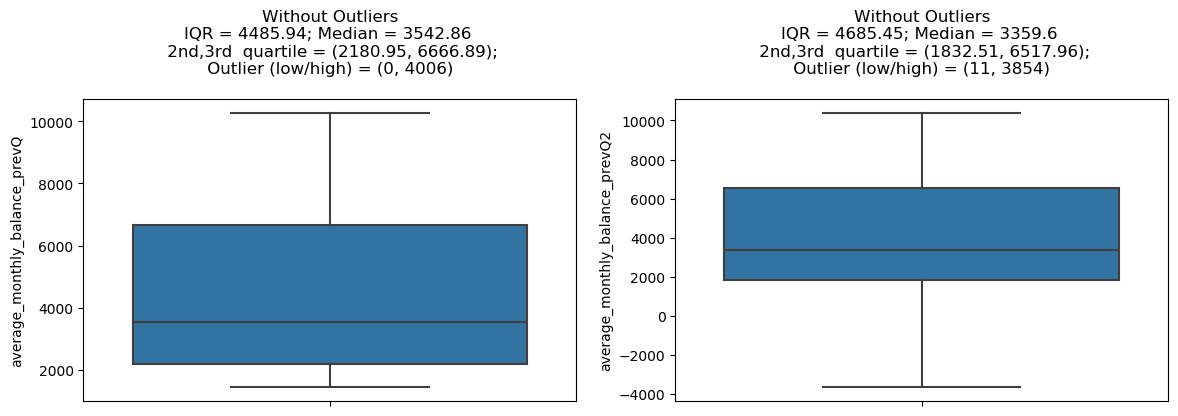

In [37]:
UVA_outlier(data,previous_quarters, include_outlier = False)

Summary:
* Outliers in previous two quarters are very similar but significantly large in number.

## Investigation directions from Univariate Analysis
1. customer_id variable can be dropped.
2.  Is there there any common trait/relation between the customers who are performing high transaction credit/debits?
   * customer_nw_category might explain that.
   * Occupation = Company might explain them
   * popular cities might explain this
4.  Customers whose last transaction was 6 months ago, did all of them churn? 
5. Possibility that cities and branch code with very few accounts may lead to churning.
